In [170]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate


In [66]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
DATA = automobile.data.features 

FEATURES_OF_INTEREST = ["wheel-base", "length", "width", "height", "curb-weight", "engine-size",
"bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg"]
TARGET = "price"

x = DATA[FEATURES_OF_INTEREST]
y = DATA[TARGET]


# remove rows with unknown values (for X and Y)
initialRows = x.shape[0]
x = x.dropna()
y = y.dropna()
nonNullIndices = y.index.intersection(x.index)
x = x.loc[nonNullIndices]
y = y.loc[nonNullIndices]
finalRows = x.shape[0]
rowsDeleted = initialRows-finalRows
print("Rows deleted:",rowsDeleted)
print("Remaining Observations:",x.shape[0])


Rows deleted: 10
Remaining Observations: 195


# Cross Validation

In [67]:
num_cv = 40
folds = 5
def cross_validation_analysis(model_features, targets):

    # generate cv results
    predictions = np.zeros((num_cv*folds, targets.shape[0]))
    for i in range(num_cv):
        
        cv_results = cross_validate(LinearRegression(), model_features, targets, cv=folds, return_estimator=True)
        for i2 in range(folds):
            model = cv_results["estimator"][i2]
            # each row is one model realization
            predictions[i+i2:] = model.predict(model_features)
        break

    # each row is an observation
    predictions = predictions.T

    # sort observation by target value
    sortY = sorted(zip(targets, predictions), key=lambda i: i[0])
    sorted_targets = np.array([i[0] for i in sortY])
    sorted_predictions = np.array([i[1] for i in sortY])

    # average prediction for each observation
    avg_prediction = np.mean(sorted_predictions, axis=1)

    # plot avgpred vs true 
    # plot 20 model preds vs true
    fig,ax = plt.subplots()
    for i in range(20):
        modelx = sorted_predictions[:, i]
        ax.scatter(sorted_targets,modelx,alpha=0.3)

    ax.scatter(sorted_targets,avg_prediction, alpha=0.9, label="avg prediction")
    ax.set_ylabel("Predicted Price")
    ax.set_xlabel("True Price")
    ax.set_title("Predicted vs True Price")
    ax.legend()
    # plt.show()

    # calc mse of each prediction
    mses = np.zeros((200,1))
    for model_idx in range(200):
        mses[model_idx] = np.mean((targets-predictions[:,model_idx])**2)
        break
    
    expectedMSE = np.mean(mses)
    print("expected MSE:",expectedMSE)

    # calc variance
    variance = 0
    for y_i in range(avg_prediction.shape[0]):
        temp = 0
        for model_l in range(num_cv*folds):
            temp += (sorted_predictions[y_i,model_l]-avg_prediction[y_i])**2

        variance += temp/(num_cv*folds)
    variance /= avg_prediction.shape[0]
    print("variance:",variance)

    print("bias^2 + noise variance:",expectedMSE-variance)


## a)

Model 1) $price = 1/cityMpg + peakRpm + height$

E{MSE}: 157710.72873780655

variance: 36323.41642162207

$bias^2$ + noise variance: 121387.31231618449

This model has much more bias compared to variance. This means that this model has greater consistency but more systematic error across data sets. 

expected MSE: 157710.72873780655
variance: 36323.41642162207
bias^2 + noise variance: 121387.31231618449


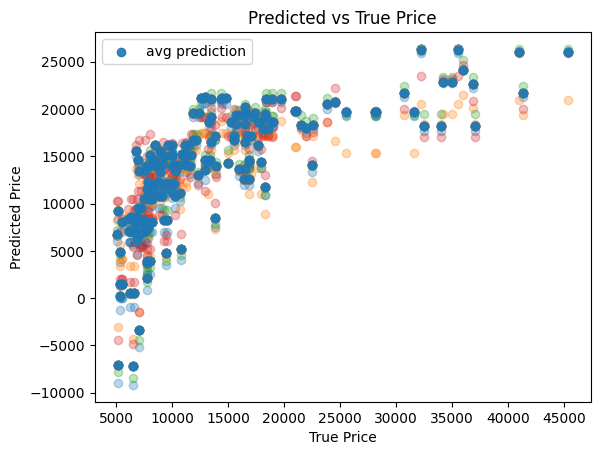

In [68]:
m1_features = x[["city-mpg","peak-rpm","stroke"]]
m1_features["city-mpg"].transform(lambda i: 1/i)
    
cross_validation_analysis(m1_features, y)


## b) 

Model 2) $price = 1/cityMpg + peakRpm + compressionRatio$

E{MSE}: 135954.56410878792

variance: 30485.6260777169

$bias^2$ + noise variance: 105468.93803107101

This model has much more bias compared to variance. This means that this model has greater consistency but more systematic error across data sets. 

expected MSE: 135954.56410878792
variance: 30485.6260777169
bias^2 + noise variance: 105468.93803107101


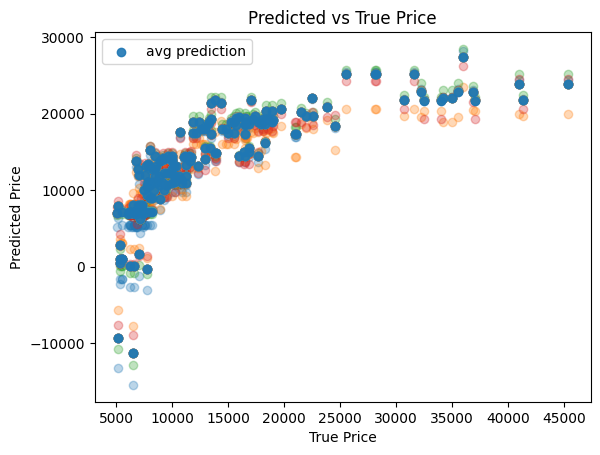

In [61]:
m2_features = x[["city-mpg","peak-rpm","compression-ratio"]]
m2_features["city-mpg"].transform(lambda i: 1/i)

cross_validation_analysis(m2_features, y)

## c)

Model 3) $price = 1/cityMpg + curbWeight^2 + stroke$

E{MSE}: 92649.62806278672

variance: 30132.15237409223

$bias^2$ + noise variance: 62517.475688694496

This model has much more bias compared to variance. This means that this model has greater consistency but more systematic error across data sets. 

expected MSE: 92649.62806278672
variance: 30132.15237409223
bias^2 + noise variance: 62517.475688694496


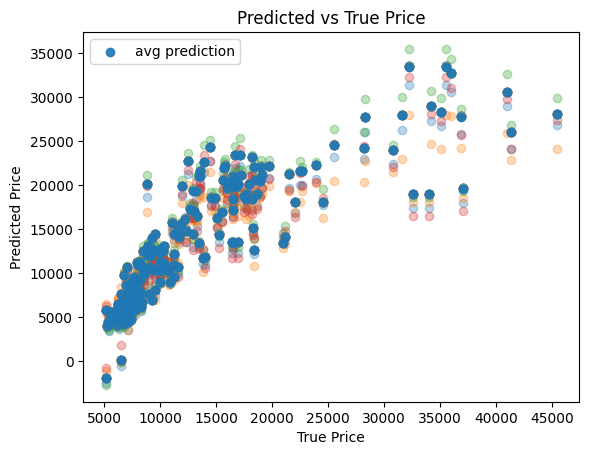

In [69]:

m3_features = x[["city-mpg","peak-rpm","curb-weight"]]
m3_features["city-mpg"].transform(lambda i: 1/i)
m3_features["curb-weight"].transform(lambda i: i**2)

cross_validation_analysis(m3_features, y)


## d)

All my models had similar variances of 36323, 30485, and 30132. The third model had lower expected MSE by about 30% so its bias was a lot lower than the first two. To compare the biases and variances I compared the proportion of bias and variance. Model 1 had 3.34 times more bias, Model 2 had 3.46 times more bias, and Model 3 had 2.07 times more bias. Thus, Model 3 appears to be the most complex as it has proportionally more bias than the other models. Model 3 also has the lowest variance overall. The next most complex model appears to be Model 1 since it has 3.34 times more bias instead compared to Model 2 which had 3.46 times more bias. In conclusion, the order of the models from least to most complex is Model 2, Model 1, and finally Model 3.

## e) 



I think I will still select Model 3. This is the same decision as the one I made in Homework 1. All of the models had similar variances but this model had about 30% less bias + noise variance. This means when predicting new values, this model will likely be more generalizable to new data compared to the other 2 models.

# Mini Project check in

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math
from scipy import signal


# load image
boat = np.asarray(Image.open('fishing_boat.bmp'), dtype=np.float64)

# my section
firstname = len('albert')-1
lastname = len('yuan')-1
x = 8*firstname + 1
y = 8*lastname + 1
K = 8
my_chip = boat[x:x+K,y:y+K]

# basis vector matrix
def basis(u, v, x, y, P, Q):
    alpha = np.sqrt(1/P) if u == 0 else np.sqrt(2/P)
    beta = np.sqrt(1/Q) if v == 0 else np.sqrt(2/Q)
    return alpha*beta*math.cos(math.pi*(2*x-1)*(u-1)/(2*P))*math.cos(math.pi*(2*y-1)*(v-1)/(2*P))

def getBasisChip(imgShape, u,v):
    P, Q = imgShape
    img = np.zeros((P,Q))

    # change x and y to be 1-indexed
    # go down by columns
    for y in range(1,Q+1):
        for x in range(1,P+1):
            img[y-1][x-1] = basis(u, v, x, y, P, Q)
    return img

def getBasisVectorMatrix(chip):
    P, Q = chip.shape
    basisVectorMatrix = np.zeros(((P*Q)*(P*Q)))
    i = 0
    for x in range(1,P+1):
        for y in range(1,Q+1):
            for v in range(1,Q+1):
                for u in range(1,P+1):
                    basisVectorMatrix[i] = basis(u, v, x, y, P, Q)
                    i += 1

    basisVectorMatrix = basisVectorMatrix.reshape((P*Q),(P*Q))
    return basisVectorMatrix

basisVectorMatrix = getBasisVectorMatrix(my_chip)

## a)


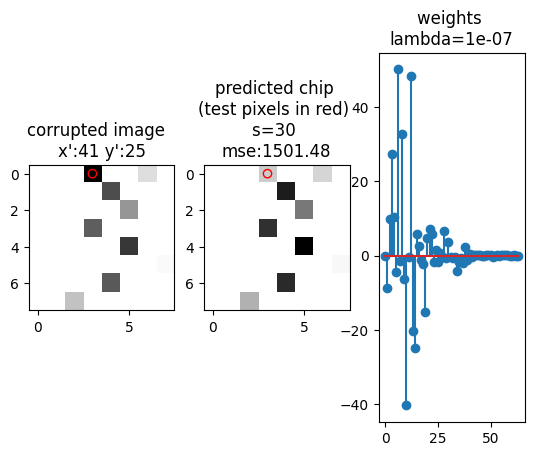

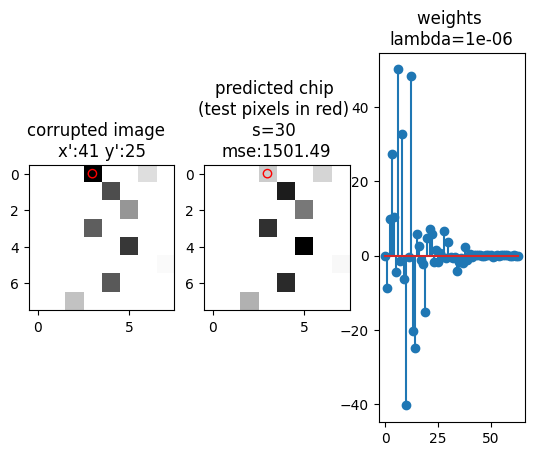

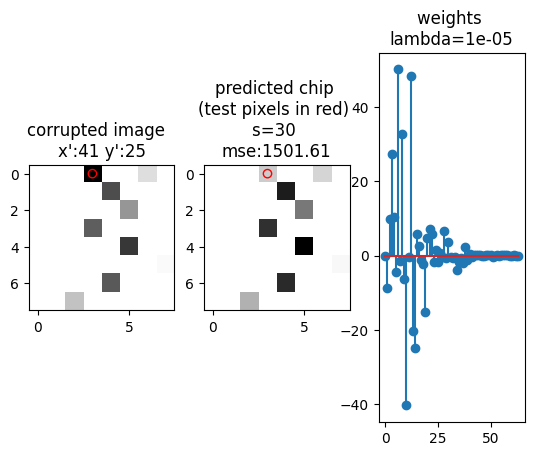

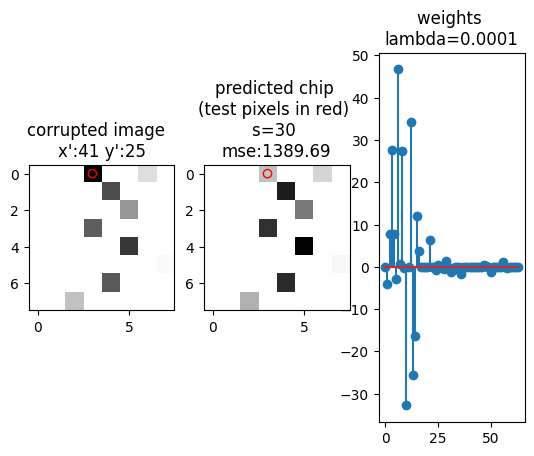

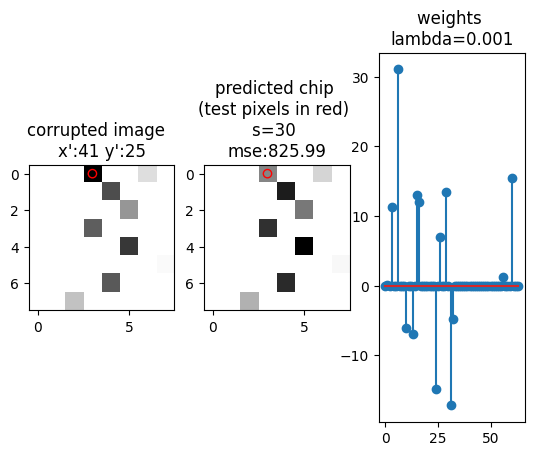

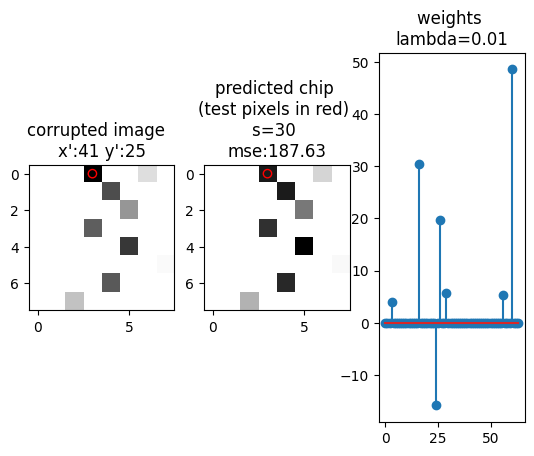

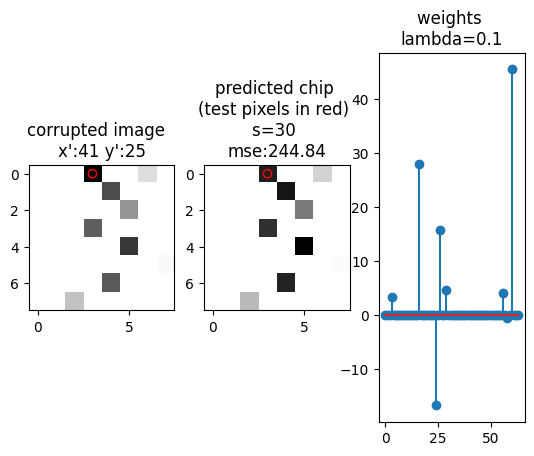

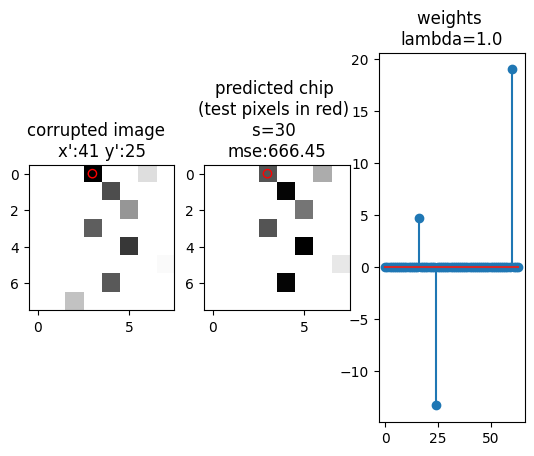

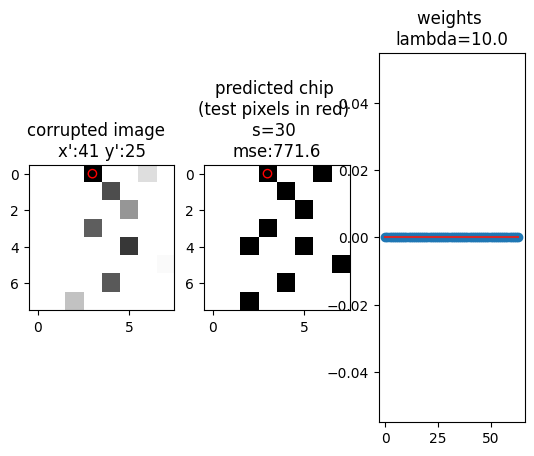

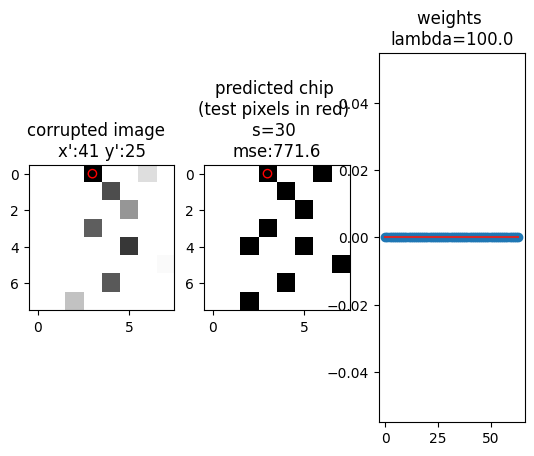

In [24]:

from sklearn.linear_model import Lasso
# make s_30
def makeTrainTestImg(src, s, m):
    totalPixels = src.shape[0] * src.shape[1] 
    trainimg = np.full((src.shape[0],src.shape[1]), np.NaN)
    testimg = np.full((src.shape[0],src.shape[1]), np.NaN)
    fullimg = np.full((src.shape[0],src.shape[1]), np.NaN)

    idx_to_keep = np.random.choice(totalPixels,s, replace=False)

    for i in idx_to_keep[m:]:
        x = i // 8
        y = i-(x*8)
        trainimg[x][y] = src[x][y]
        fullimg[x][y] = src[x][y]

    for i in idx_to_keep[:m]:
        x = i // 8
        y = i-(x*8)
        testimg[x][y] = src[x][y]
        fullimg[x][y] = src[x][y]

    return trainimg, testimg, fullimg

def createUnderdeterminedSystem(chip):
    sensed_idx= ~np.isnan(chip)
    chip_noNan = chip[sensed_idx]

    underdeterminedBVM = np.zeros((chip_noNan.shape[0],basisVectorMatrix.shape[1]))
    i = 0
    P2 = sensed_idx.shape[0]
    Q2 = sensed_idx.shape[1]
    for x in range(P2):
        for y in range(Q2):
            if sensed_idx[x][y]:
                underdeterminedBVM[i] = basisVectorMatrix[x*P2 + y]
                i+=1
    return underdeterminedBVM, chip_noNan

lambdas = np.logspace(-7, 2, 10)
S = 10
M = 20
P,Q = (K,K)


def plot_corruptVSpredChip(chip):
    chip_train, chip_test, chip_full  = makeTrainTestImg(chip, S, S//6)
    chip_train_BVM, chip_train_noNAN = createUnderdeterminedSystem(chip_train)
    MSEs = []
    for l in lambdas:
        model = Lasso(l).fit(chip_train_BVM, chip_train_noNAN)
        weights = np.reshape(model.coef_, (model.coef_.shape[0],1))
        pred_chip = np.reshape(model.predict(basisVectorMatrix), (P,Q))

        # only calc the chip_test pixels
        test_indices= ~np.isnan(chip_test)
        chip_test_noNan = chip_test[test_indices]
        pred_chip_test_noNan = pred_chip[test_indices]
        mse = np.mean((chip_test_noNan-pred_chip_test_noNan)**2)
        MSEs.append(mse)

        # for displaying diff between true and predicted test pixels
        displaypred = pred_chip
        chipNans = np.isnan(chip_full)
        for i in range(chipNans.shape[0]):
            for j in range(chipNans.shape[1]):
                if chipNans[i][j]:
                    displaypred[i][j] = np.NaN
        testpts_x = []
        testpts_y = []
        for i in range(test_indices.shape[0]):
            for j in range(test_indices.shape[1]):
                if test_indices[i][j]:
                    testpts_x.append(j)
                    testpts_y.append(i)

        fig, ax = plt.subplots(1,3)
        ax[0].imshow(chip_full, cmap='gray')
        ax[0].scatter(testpts_x,testpts_y, color='None',edgecolors="red")
        ax[0].set_title(f"corrupted image  \nx':{x} y':{y}")
        ax[1].imshow(displaypred, cmap='gray')
        ax[1].scatter(testpts_x,testpts_y, color='None',edgecolors="red")
        ax[1].set_title(f"predicted chip \n(test pixels in red) \ns=30 \nmse:{mse.round(2)}")
        ax[2].stem(weights)
        ax[2].set_title(f"weights \nlambda={l}")
    return MSEs
my_chip_mses = plot_corruptVSpredChip(my_chip)

## b)

When lambda was $10^0$ or higher, the reconstructed chip was just a black square or a couple of lines. The model weights were all or almost all zero and this makes sense because when lambda is high, the model prioritizes minimizing all weights to be zero. When lambda was $10^{-4}$ or lower, the weights were all pretty much the same. This is because the penalty of non zero weights was so low that it was basically not considered in the objective function. When lambda was $10^{-3}$ to $10^{-1}$ the reconstructed chip was most similar to the original chip. Thus we can conclude that lambdas over $10^{-1}$ are too influential on the objective function and lambda lower than $10^{-3}$ are not influential enough on the objective function.

## c)

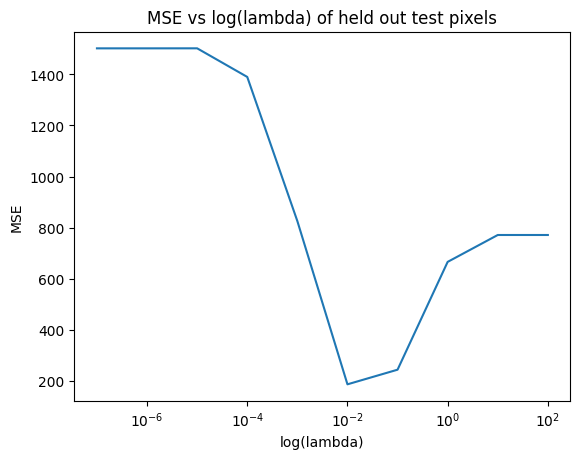

In [25]:
fig, ax = plt.subplots()
ax.set_xscale("log")
ax.plot(lambdas, my_chip_mses)
ax.set_title("MSE vs log(lambda) of held out test pixels")
ax.set_xlabel("log(lambda)")
ax.set_ylabel("MSE")

plt.show()

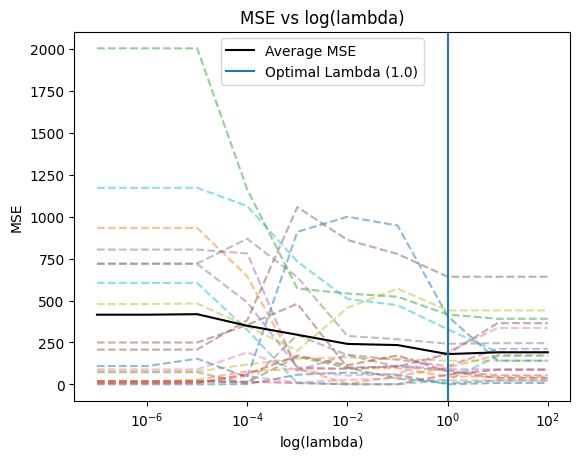

1.0

In [26]:
import warnings
warnings.filterwarnings("ignore")

def CrossvalidateLambda(chip, plot=False):
    if plot:
        fig, ax = plt.subplots()
        ax.set_xscale("log")
        ax.set_title("MSE vs log(lambda)")
        ax.set_xlabel("log(lambda)")
        ax.set_ylabel("MSE")

    avgMSEs = []
    for fold in range(M):
        chip_train, chip_test, chip_full  = makeTrainTestImg(chip, S, S//6)
        chip_train_BVM, chip_train_noNAN = createUnderdeterminedSystem(chip_train)
        MSEs = []
        for l in lambdas:
            model = Lasso(l).fit(chip_train_BVM, chip_train_noNAN)
            # weights = np.reshape(model.coef_, (model.coef_.shape[0],1))
            pred_chip = np.reshape(model.predict(basisVectorMatrix), (P,Q))

            # calc mse only with test chip
            sensed_idx= ~np.isnan(chip_test)
            chip_test_noNan = chip_test[sensed_idx]
            pred_chip_test_noNan = pred_chip[sensed_idx]

            MSEs.append(np.mean((chip_test_noNan-pred_chip_test_noNan)**2))
        # plot one fold's worth of MSEs
        avgMSEs.append(MSEs)

        if plot:
            ax.plot(lambdas, MSEs, linestyle="--",alpha=0.5)

    # plot avg over all the folds
    avgMSEs = np.mean(avgMSEs, axis=0)
    optimalLambda = lambdas[np.argmin(avgMSEs)]
    if plot:
        ax.plot(lambdas, avgMSEs,c="black",label="Average MSE")
        ax.axvline(optimalLambda, label=f"Optimal Lambda ({optimalLambda})")
        ax.legend()
        plt.show()
    return optimalLambda
CrossvalidateLambda(my_chip, plot=True)

## e)


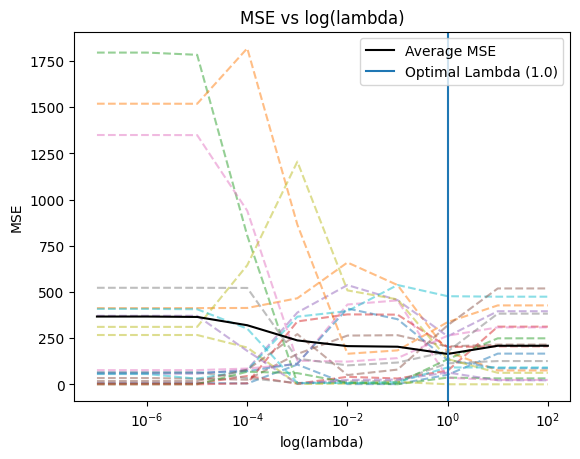

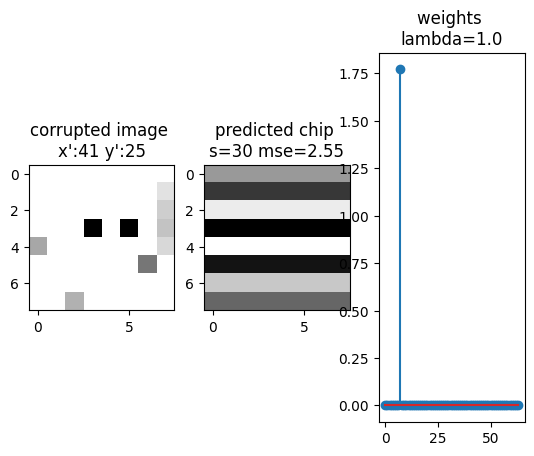

In [27]:
def reconstruct_chip(chip, plot=False):
    optimalLambda = CrossvalidateLambda(chip, plot=plot)
    
    _,_,corrupted_chip = makeTrainTestImg(chip, S, S//6)
    chip_BVM, chip_noNAN = createUnderdeterminedSystem(corrupted_chip)
    model = Lasso(optimalLambda).fit(chip_BVM, chip_noNAN)
    weights = np.reshape(model.coef_, (model.coef_.shape[0],1))
    pred_chip = np.reshape(model.predict(basisVectorMatrix), (P,Q))

    mse = np.mean((chip-pred_chip)**2)/(chip.shape[0]*chip.shape[1])
    if plot:
        fig, ax = plt.subplots(1,3)
        ax[0].imshow(corrupted_chip, cmap='gray')
        ax[0].set_title(f"corrupted image \nx':{x} y':{y}")
        ax[1].imshow(pred_chip, cmap='gray')
        ax[1].set_title(f"predicted chip \ns=30 mse={mse.round(2)}")
        ax[2].stem(weights)
        ax[2].set_title(f"weights \nlambda={optimalLambda}")
        plt.show()
    return pred_chip
pred = reconstruct_chip(my_chip, plot=True)


# Whole Image Reconstruction

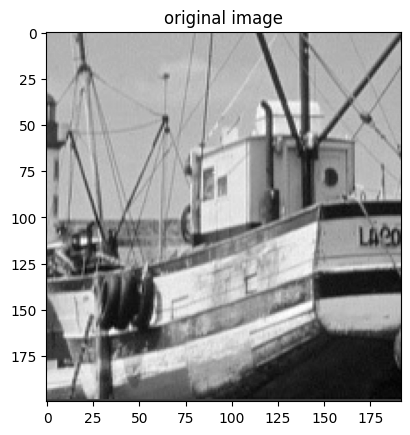

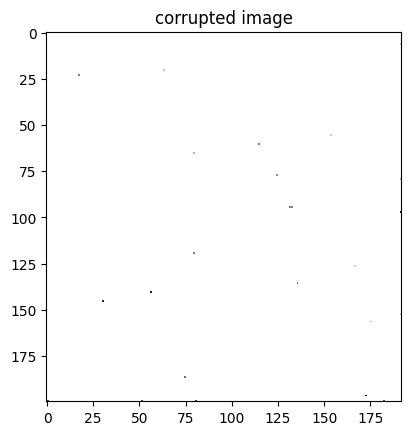

here (6000,)
0 0


ValueError: Found array with 0 sample(s) (shape=(0, 64)) while a minimum of 1 is required by Lasso.

In [33]:
S = 10
def corruptImg(img, s, plot=False):
    
    corrupted_img = np.full((img.shape[0],img.shape[1]), np.NaN)
    for x in range(0,img.shape[0],8):
        for y in range(0,img.shape[1],K):
            chip = img[x:x+K,y:y+K]
            _, _, chip_full  = makeTrainTestImg(chip, s, s//6)
            corrupted_img[x:x+K,y:y+K] = chip_full
    if plot:
        fig,ax = plt.subplots()
        ax.imshow(corrupted_img, cmap='gray')
        ax.set_title("corrupted image")
        plt.show()
    return corrupted_img
    

def reconstruct_img(img, plot=False):
    if plot: #show original image
        fig,ax = plt.subplots()
        ax.imshow(img, cmap='gray')
        ax.set_title("original image")
        plt.show()
    corrupted_img = corruptImg(img, S, plot=True)


    reconstructed_img = np.full((corrupted_img.shape[0],corrupted_img.shape[1]), np.NaN)
    for x in range(0,boat.shape[0],8):
        for y in range(0,boat.shape[1],K):
            print(x,y)
            chip = corrupted_img[x:x+K,y:y+K]
            pred_chip = reconstruct_chip(chip)
            reconstructed_img[x:x+K,y:y+K] = pred_chip
    mse = np.mean((img-reconstructed_img)**2)/(img.shape[0]*img.shape[1])

    if plot:
        fig,ax = plt.subplots()
        ax.imshow(reconstructed_img, cmap='gray')
        ax.set_title(f"reconstructed image mse:{mse}")
        plt.show()
    return reconstructed_img

def addMedianFilter(original_img, reconstructed_img, plot=True):
    reconstructed_img_medfilt = signal.medfilt2d(reconstructed_img, kernel_size=3)
    mse = np.mean((boat-reconstructed_img_medfilt)**2)/(original_img.shape[0]*original_img.shape[1])
    if plot:
        fig,ax = plt.subplots()
        ax.imshow(reconstructed_img_medfilt, cmap='gray')
        ax.set_title(f"reconstructed image with median filtering mse:{mse}")
        plt.show()


reconstructed_img = reconstruct_img(boat, plot=True)
addMedianFilter(boat, reconstructed_img, plot=True)